In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib
import os

In [2]:
# Load data
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\fods\model\Price_Agriculture_commodities_Week.csv")
print(data.head())  # Check the first few rows

     State District    Market              Commodity      Variety Grade   
0  Gujarat   Amreli  Damnagar  Bhindi(Ladies Finger)       Bhindi   FAQ  \
1  Gujarat   Amreli  Damnagar                Brinjal        Other   FAQ   
2  Gujarat   Amreli  Damnagar                Cabbage      Cabbage   FAQ   
3  Gujarat   Amreli  Damnagar            Cauliflower  Cauliflower   FAQ   
4  Gujarat   Amreli  Damnagar      Coriander(Leaves)    Coriander   FAQ   

  Arrival_Date  Min Price  Max Price  Modal Price  
0   27-07-2023     4100.0     4500.0       4350.0  
1   27-07-2023     2200.0     3000.0       2450.0  
2   27-07-2023     2350.0     3000.0       2700.0  
3   27-07-2023     7000.0     7500.0       7250.0  
4   27-07-2023     8400.0     9000.0       8850.0  


In [3]:

# Handle missing values
data['Modal Price'] = data['Modal Price'].fillna(data['Modal Price'].mean())

In [4]:
# Encode categorical features
categorical_columns = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [5]:

# Handle Date Features
data['Arrival_Date'] = pd.to_datetime(data['Arrival_Date'], format='%d-%m-%Y')
data['Year'] = data['Arrival_Date'].dt.year
data['Month'] = data['Arrival_Date'].dt.month
data['Day'] = data['Arrival_Date'].dt.day
data['DayOfWeek'] = data['Arrival_Date'].dt.weekday
data['DayOfYear'] = data['Arrival_Date'].dt.dayofyear


In [6]:
# Drop original date column
data = data.drop(columns=['Arrival_Date'])

# Define features and target
X = data.drop(columns=['Modal Price'])
y = data['Modal Price']

In [7]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [8]:
# Evaluate the model
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = xgb_model.score(X_test, y_test)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error (MSE): 615680.7882407907
R2 Score: 0.9800735238248435


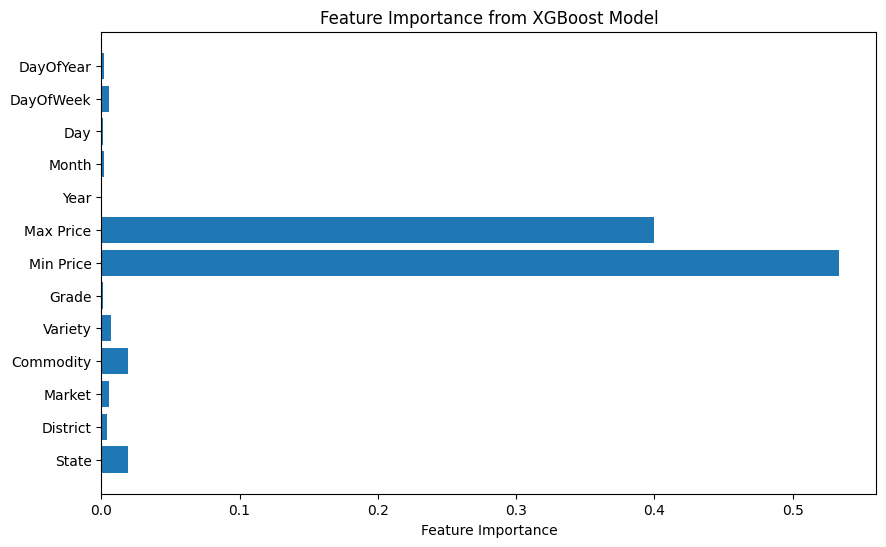

In [9]:
# Feature importance plot
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost Model')
plt.show()

In [10]:





import joblib
import os

# Define the path where you want to save the files
model_save_path = r'C:\path_to_save_model'

# Check if the directory exists; if not, create it
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

# Save the XGBoost model
joblib.dump(xgb_model, os.path.join(model_save_path, 'xgb_commodity_price_model.pkl'))
print(f"XGBoost model saved at: {os.path.join(model_save_path, 'xgb_commodity_price_model.pkl')}")

# Save the label encoders dictionary
joblib.dump(label_encoders, os.path.join(model_save_path, 'label_encoders.pkl'))
print(f"Label encoders saved at: {os.path.join(model_save_path, 'label_encoders.pkl')}")

XGBoost model saved at: C:\path_to_save_model\xgb_commodity_price_model.pkl
Label encoders saved at: C:\path_to_save_model\label_encoders.pkl


In [11]:
# Load the model and label encoders
xgb_model = joblib.load(r'C:\path_to_save_model\xgb_commodity_price_model.pkl')
label_encoders = joblib.load(r'C:\path_to_save_model\label_encoders.pkl')

In [12]:
# Function to get user input and make a prediction (with default values set)
# Function to get user input and make a prediction
def get_user_input():
    # Prompt the user for input values
    state = input("Enter state: ")
    district = input("Enter district: ")
    market = input("Enter market: ")
    commodity = input("Enter commodity: ")
    variety = input("Enter variety: ")
    grade = input("Enter grade: ")
    year = int(input("Enter year: "))
    month = int(input("Enter month: "))
    day = int(input("Enter day: "))
    day_of_week = int(input("Enter day of the week (0=Monday, 6=Sunday): "))
    day_of_year = int(input("Enter day of the year: "))
    min_price = float(input("Enter min price: "))
    max_price = float(input("Enter max price: "))

    # Encode categorical features using the loaded LabelEncoders
    state = label_encoders['State'].transform([state])[0]
    district = label_encoders['District'].transform([district])[0]
    market = label_encoders['Market'].transform([market])[0]
    commodity = label_encoders['Commodity'].transform([commodity])[0]
    variety = label_encoders['Variety'].transform([variety])[0]
    grade = label_encoders['Grade'].transform([grade])[0]

    # Prepare the input data as a DataFrame
    input_data = pd.DataFrame({
        'State': [state], 'District': [district], 'Market': [market],
        'Commodity': [commodity], 'Variety': [variety], 'Grade': [grade],
        'Year': [year], 'Month': [month], 'Day': [day],
        'DayOfWeek': [day_of_week], 'DayOfYear': [day_of_year],
        'Min Price': [min_price],  # User-provided Min Price
        'Max Price': [max_price]   # User-provided Max Price
    })
    
    # Ensure the columns are in the same order as the model's expected features
    feature_columns = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Min Price', 'Max Price',
                       'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear']
    input_data = input_data[feature_columns]

    return input_data

# Get user input and make a prediction
user_input = get_user_input()
prediction = xgb_model.predict(user_input)
print(f"Predicted Price: {prediction[0]:.2f}")

Enter state: Gujarat
Enter district: Amreli
Enter market: Damnagar
Enter commodity: Cabbage
Enter variety: Cabbage
Enter grade: FAQ
Enter year: 2024
Enter month: 11
Enter day: 13
Enter day of the week (0=Monday, 6=Sunday): 2
Enter day of the year: 2024
Enter min price: 2350
Enter max price: 3000
Predicted Price: 2715.29
